In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('F1.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Q7 percentage of missing values

In [21]:
data = {'Loan_ID' : [(1-df.Loan_ID.count()/614)*100],
      'Gender' : [(1-df.Gender.count()/614)*100],
      'Married' : [(1-df.Married.count()/614)*100],
      'Dependents' : [(1-df.Married.count()/614)*100],
      'Education' : [(1-df.Education.count()/614)*100],
      'Self_Employed' : [(1-df.Self_Employed.count()/614)*100],
      'ApplicantIncome' : [(1-df.ApplicantIncome.count()/614)*100],
      'CoapplicantIncome' : [(1-df.CoapplicantIncome.count()/614)*100],
      'LoanAmount' : [(1-df.LoanAmount.count()/614)*100],
      'Loan_Amount_Term' : [(1-df.Loan_Amount_Term.count()/614)*100],
      'Credit_History' : [(1-df.Credit_History.count()/614)*100],
      'Property_Area' : [(1-df.Property_Area.count()/614)*100],
      'Loan_Status' : [(1-df.Loan_Status.count()/614)*100]}

missing_value = pd.DataFrame(data, index = ['percentage'])

In [24]:
missing_value = missing_value.T

In [27]:
missing_value.sort_values(by = 'percentage', ascending = False)

,percentage
Credit_History,8.143322
Self_Employed,5.211726
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Gender,2.117264
Dependents,0.488599
Married,0.488599
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
Education,0.000000


# Q8 Gender and Education level box plots to check average income

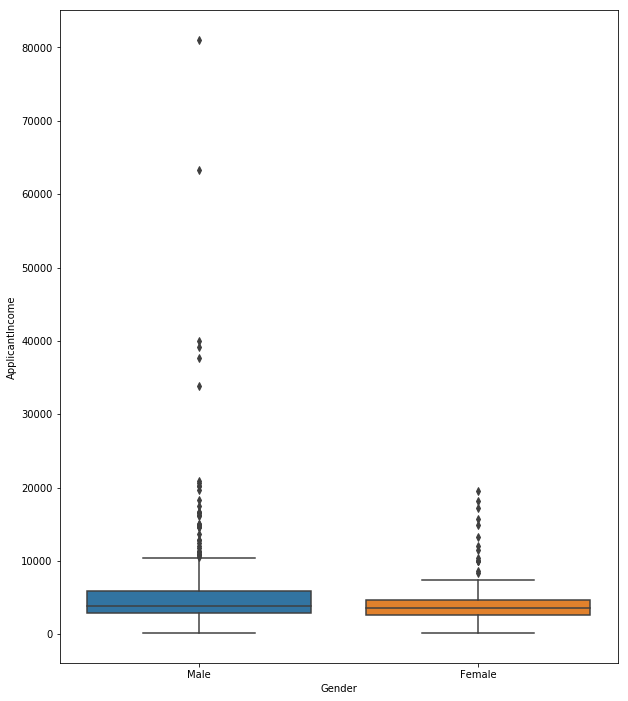

In [35]:
fig,axis=plt.subplots(figsize=(10,12))
sns.boxplot(x='Gender',y='ApplicantIncome',data=df[df.Gender.notnull()])

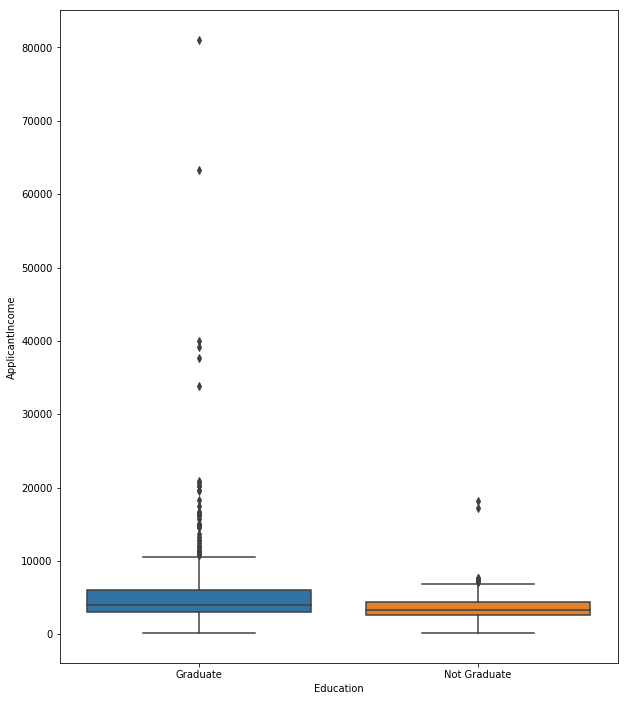

In [42]:
fig,axis=plt.subplots(figsize=(10,12))
sns.boxplot(x='Education',y='ApplicantIncome',data=df[df.Gender.notnull()])

### Male and Graduate have more outlier on basis of ApplicantIncome

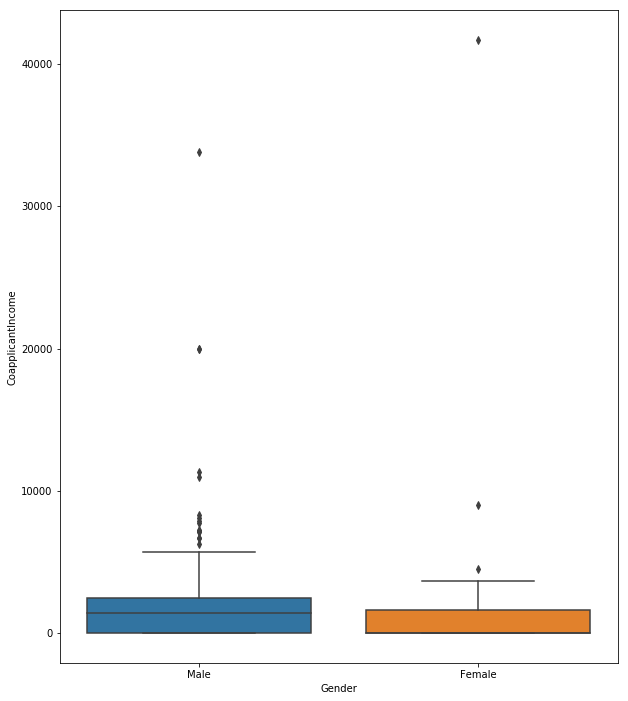

In [43]:
fig,axis=plt.subplots(figsize=(10,12))
sns.boxplot(x='Gender',y='CoapplicantIncome',data=df[df.Gender.notnull()])

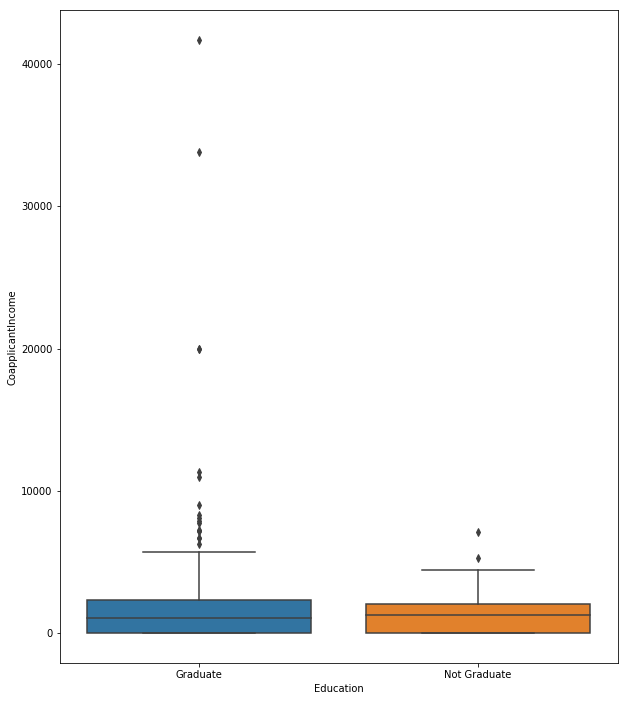

In [45]:
fig,axis=plt.subplots(figsize=(10,12))
sns.boxplot(x='Education',y='CoapplicantIncome',data=df[df.Gender.notnull()])

### Male and Graduate have more outlier on basis of CoapplicantIncome

# Q9 pivot tables 

In [7]:
pivot_table = df.pivot_table(index = 'Gender' ,columns = 'Loan_Status', aggfunc = np.count_nonzero)

In [8]:
pivot_table

ApplicantIncome      CoapplicantIncome        Credit_History  \
Loan_Status               N    Y                 N      Y              N   
Gender                                                                     
Female                   37   75              10.0   26.0           21.0   
Male                    150  339              82.0  216.0           87.0   

                   Dependents      Education      ...  Loan_Amount_Term  \
Loan_Status      Y          N    Y         N    Y ...                 N   
Gender                                            ...                     
Female        74.0         37   75        37   75 ...              37.0   
Male         333.0        150  339       150  339 ...             150.0   

                   Loan_ID      Married      Property_Area      Self_Employed  \
Loan_Status      Y       N    Y       N    Y             N    Y             N   
Gender                                                                          
Female        75.0      37   75      37   75            37   75            37   
Male         339.0     150  339     150  339           150  339           150   

                  
Loan_Status    Y  
Gender            
Female        75  
Male         339  

[2 rows x 22 columns]

In [11]:
#Education pivot table

In [9]:
pivot_table = df.pivot_table(index = 'Gender',values = 'Education' ,columns = 'Loan_Status', aggfunc = np.count_nonzero)

In [10]:
pivot_table

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


# Q10 pivot table-probability of  loan 

##### replace null value of Credit history by mode   

In [ ]:
df.Credit_History.mode()

In [59]:
df.Credit_History.fillna(1,inplace = True)

In [62]:
df.Credit_History.isnull().any()

False

In [75]:
pivot_table = df.pivot_table(index = 'Credit_History', columns = 'Loan_Status', aggfunc = np.count_nonzero)

In [64]:
pivot_table

ApplicantIncome      CoapplicantIncome        Dependents       \
Loan_Status                  N    Y                 N      Y          N    Y   
Credit_History                                                                 
0.0                         82    7              44.0    4.0         82    7   
1.0                        110  415              52.0  241.0        110  415   

               Education      Gender      ...  Loan_Amount_Term         \
Loan_Status            N    Y      N    Y ...                 N      Y   
Credit_History                            ...                            
0.0                   82    7     82    7 ...              82.0    7.0   
1.0                  110  415    110  415 ...             110.0  415.0   

               Loan_ID      Married      Property_Area      Self_Employed       
Loan_Status          N    Y       N    Y             N    Y             N    Y  
Credit_History                                                                  
0.0                 82    7      82    7            82    7            82    7  
1.0                110  415     110  415           110  415           110  415  

[2 rows x 22 columns]

In [83]:
pivot_table = df.groupby(['Credit_History']).Loan_Status.value_counts().unstack()
pivot_table.apply(lambda x: x/np.sum(pivot_table,axis=1))

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.209524,0.790476


In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Q11 

Text(0,0.5,'Number of applicant')

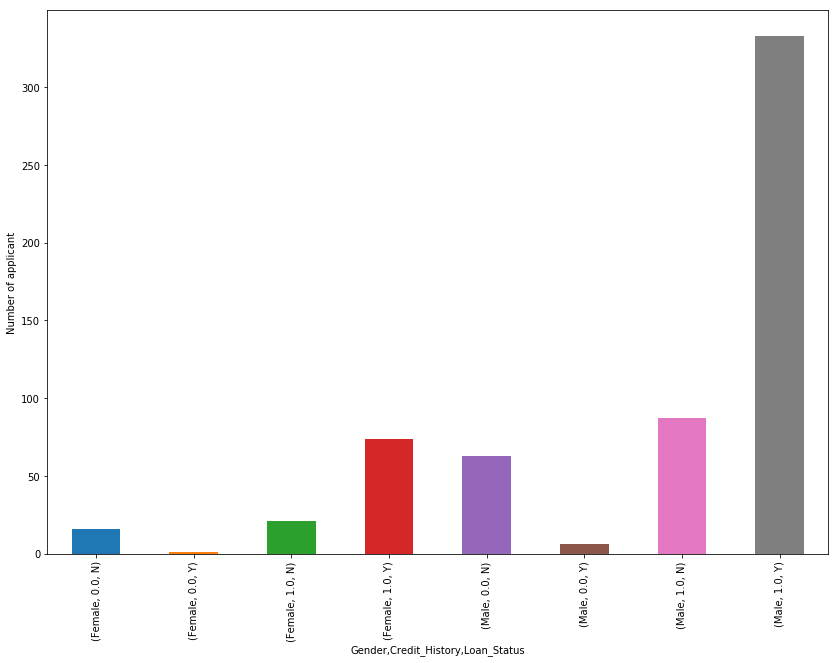

In [100]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(['Gender','Credit_History','Loan_Status']).Loan_ID.count().plot(kind = 'bar')
plt.ylabel('Number of applicant')

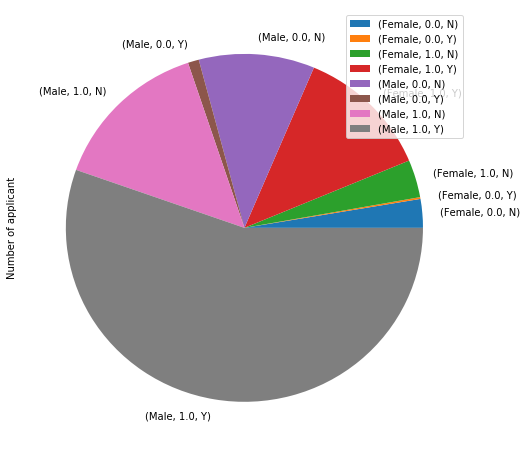

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
df.groupby(['Gender','Credit_History','Loan_Status']).Loan_ID.count().plot(kind = 'pie')
plt.ylabel('Number of applicant')
plt.legend()

# Q12

In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [119]:
table1=df[['Gender','Property_Area','LoanAmount']].groupby(['Gender','Property_Area'])
table1.agg(['min', 'max','sum','std','mean'])

LoanAmount                                       
                            min    max      sum        std        mean
Gender Property_Area                                                  
Female Rural               46.0  255.0   2929.0  49.905545  122.041667
       Semiurban           36.0  600.0   7168.0  93.652366  135.245283
       Urban                9.0  350.0   3713.0  71.285199  116.031250
Male   Rural               40.0  570.0  22603.0  82.361121  155.882759
       Semiurban           25.0  600.0  25083.0  78.112829  148.420118
       Urban               17.0  650.0  22469.0  88.120696  144.032051

In [120]:
table2=df[['Gender','Property_Area','ApplicantIncome']].groupby(['Gender','Property_Area'])
table2.agg(['min', 'max','sum','std','mean'])

ApplicantIncome                                         
                                 min    max     sum          std         mean
Gender Property_Area                                                         
Female Rural                     645  10000  104481  2014.367239  4353.375000
       Semiurban                 210  19484  263300  3793.550963  4787.272727
       Urban                     416  18165  152288  4158.103096  4614.787879
Male   Rural                     150  81000  859385  7158.631222  5691.291391
       Semiurban                1668  39999  930955  5674.126191  5412.529070
       Urban                    1000  63337  872979  5755.298960  5258.909639

In [122]:
table3=df[['Gender','Property_Area','CoapplicantIncome']].groupby(['Gender','Property_Area'])
table3.agg(['min', 'max','sum','std','mean'])

CoapplicantIncome                                       \
                                   min      max            sum          std   
Gender Property_Area                                                          
Female Rural                       0.0   3683.0   12541.000000  1101.960939   
       Semiurban                   0.0   8980.0   51579.000000  1604.858727   
       Urban                       0.0  41667.0   59977.000000  7218.797550   
Male   Rural                       0.0   8333.0  272954.120001  1805.360043   
       Semiurban                   0.0  20000.0  294447.000000  2413.022929   
       Urban                       0.0  33837.0  284892.799988  3330.228529   

                                   
                             mean  
Gender Property_Area               
Female Rural           522.541667  
       Semiurban       937.800000  
       Urban          1817.484848  
Male   Rural          1807.643179  
       Semiurban      1711.901163  
       Urban          1716.221687

# Q13 filling missing value-loan amount

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [130]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [132]:
df.LoanAmount.fillna(df.LoanAmount.median(), inplace=True)

In [135]:
df.LoanAmount.isnull().any()

False